# 忘却機能つき逐次最小二乗法の実装

『田中聡久、藤本悠介、永原正章．線形システム同定の基礎．コロナ社，2021，p.135』のグラフをPythonで再現

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

In [2]:
class Plant1(object):
    def __init__(self):
        self.k0 = 0.0
        self.k1 = 0.0
        self.k2 = 0.0
        self.k3 = 0.0
        return
    def get(self, signal):
        self.k3 = self.k2
        self.k2 = self.k1
        self.k1 = self.k0
        self.k0 = signal
        return ((self.k0 + self.k1 + self.k2 + self.k3) * 0.25) + np.random.normal(loc=0,scale = 0.1)

In [3]:
class Plant2(object):
    def __init__(self):
        self.k0 = 0.0
        self.k1 = 0.0
        self.k2 = 0.0
        self.k3 = 0.0
        return
    def get(self, signal):
        self.k3 = self.k2
        self.k2 = self.k1
        self.k1 = self.k0
        self.k0 = signal
        return ((self.k0 + self.k1 + self.k2 + self.k3) * 0.5) + np.random.normal(loc=0,scale = 0.1)

In [4]:
# CFF: Constant Forgetting Factor
# RLS: Recursive Least Square
class CFF_RLS(object):
    def __init__(self, forget):
        self.len = 4
        self.theta = np.zeros((self.len,1))
        self.fai = np.zeros((self.len,1))
        self.cov = np.identity(self.len) * 100
        self.forget = forget
        return

    def update(self, x, y):
        self.fai[1:] = self.fai[0:-1]
        self.fai[0] = x
        gain = (self.cov @ self.fai) / (self.fai.T @ self.cov @ self.fai + self.forget)
        error = y - (self.fai.T @ self.theta)
        self.theta = self.theta + (gain @ error)
        self.cov = (self.cov - (gain @ self.fai.T @ self.cov)) / self.forget
        return

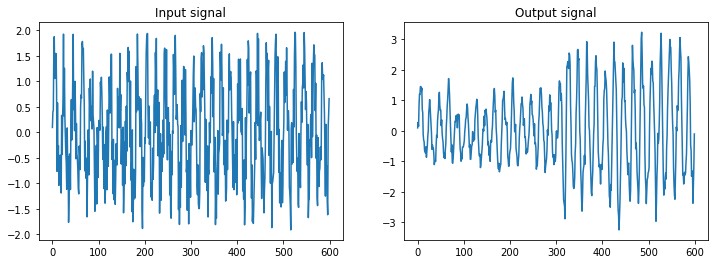

In [5]:
plant1 = Plant1()
plant2 = Plant2()
time = np.arange(600)
input_signal_array = []
output_signal_array = []
for i in time:
    input_signal = np.sin(2.0 * np.pi * i /20.0) + np.random.uniform(-1, 1)
    if i < 300:
        output_signal = plant1.get(input_signal)
    else:
        output_signal = plant2.get(input_signal)
    input_signal_array.append(input_signal)
    output_signal_array.append(output_signal)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(time, input_signal_array)
plt.title("Input signal")
plt.subplot(1, 2, 2)
plt.plot(time, output_signal_array)
plt.title("Output signal")
plt.show()

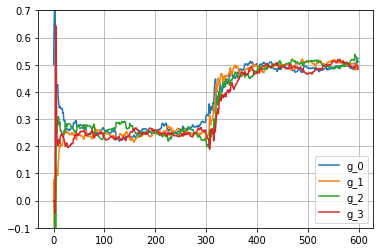

In [6]:
log = []
rls = CFF_RLS(forget=0.97)
for t in time:
    rls.update(input_signal_array[t], output_signal_array[t])
    log.append(rls.theta)
        
for i in range(rls.theta.shape[0]):
    plt.plot(time, [log[j][i] for j in time], label="g_" + str(i))
plt.grid(True)
plt.legend()
plt.ylim(-0.1, 0.7)
plt.show()